# **BlueBerry Yield Prediction**

## 1. Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

## 2. Import data

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/Data/blueberry yield/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Data/blueberry yield/train.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Preview data

In [6]:
train_data.head()

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         24.0                0.39  0.425011   0.417545   
1                  41.2         24.0                0.39  0.444908   0.422051   
2                  50.8         24.0                0.39  0.552927   0.470853   
3                  45.8         24.0                0.39  0.565976   0.478137   
4                  45.8         24.0                0.39  0.579677   0.494165   

       seeds       yield  
0  32.460887  4476.81146  
1  33.858317  5548.12201  
2  38.341781  6869.77760  
3  39.467561  6880.77590  
4  40.484512  7479.93417

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [8]:
train_data.describe().T

count         mean          std          min  \
id                    15289.0  7644.000000  4413.698468     0.000000   
clonesize             15289.0    19.704690     6.595211    10.000000   
honeybee              15289.0     0.389314     0.361643     0.000000   
bumbles               15289.0     0.286768     0.059917     0.000000   
andrena               15289.0     0.492675     0.148115     0.000000   
osmia                 15289.0     0.592355     0.139489     0.000000   
MaxOfUpperTRange      15289.0    82.169887     9.146703    69.700000   
MinOfUpperTRange      15289.0    49.673281     5.546405    39.000000   
AverageOfUpperTRange  15289.0    68.656256     7.641807    58.200000   
MaxOfLowerTRange      15289.0    59.229538     6.610640    50.200000   
MinOfLowerTRange      15289.0    28.660553     3.195367    24.300000   
AverageOfLowerTRange  15289.0    48.568500     5.390545    41.200000   
RainingDays           15289.0    18.660865    11.657582     1.000000   
AverageRainingDays    15289.0     0.324176     0.163905     0.060000   
fruitset              15289.0     0.502741     0.074390     0.192732   
fruitmass             15289.0     0.446553     0.037035     0.311921   
seeds                 15289.0    36.164950     4.031087    22.079199   
yield                 15289.0  6025.193999  1337.056850  1945.530610   

                              25%          50%           75%           max  
id                    3822.000000  7644.000000  11466.000000  15288.000000  
clonesize               12.500000    25.000000     25.000000     40.000000  
honeybee                 0.250000     0.500000      0.500000     18.430000  
bumbles                  0.250000     0.250000      0.380000      0.585000  
andrena                  0.380000     0.500000      0.630000      0.750000  
osmia                    0.500000     0.630000      0.750000      0.750000  
MaxOfUpperTRange        77.400000    86.000000     86.000000     94.600000  
MinOfUpperTRange        46.800000    52.000000     52.000000     57.200000  
AverageOfUpperTRange    64.700000    71.900000     71.900000     79.000000  
MaxOfLowerTRange        55.800000    62.000000     62.000000     68.200000  
MinOfLowerTRange        27.000000    30.000000     30.000000     33.000000  
AverageOfLowerTRange    45.800000    50.800000     50.800000     55.900000  
RainingDays             16.000000    16.000000     24.000000     34.000000  
AverageRainingDays       0.260000     0.260000      0.390000      0.560000  
fruitset                 0.458246     0.506600      0.560445      0.652144  
fruitmass                0.419216     0.446570      0.474134      0.535660  
seeds                   33.232449    36.040675     39.158238     46.585105  
yield                 5128.163510  6117.475900   7019.694380   8969.401840

- The yield has very high variation

In [9]:
train_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

## 4. Distribution of data

In [10]:
train_data.skew()
# Honeybee has a lot of skew

id                       0.000000
clonesize                0.049861
honeybee                41.613244
bumbles                  0.815571
andrena                  0.162047
osmia                   -0.845196
MaxOfUpperTRange         0.007359
MinOfUpperTRange         0.002006
AverageOfUpperTRange    -0.004707
MaxOfLowerTRange         0.002450
MinOfLowerTRange         0.004846
AverageOfLowerTRange     0.005105
RainingDays             -0.261968
AverageRainingDays       0.081863
fruitset                -0.426606
fruitmass               -0.055531
seeds                    0.015387
yield                   -0.291195
dtype: float64

In [11]:
num_cols = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield']

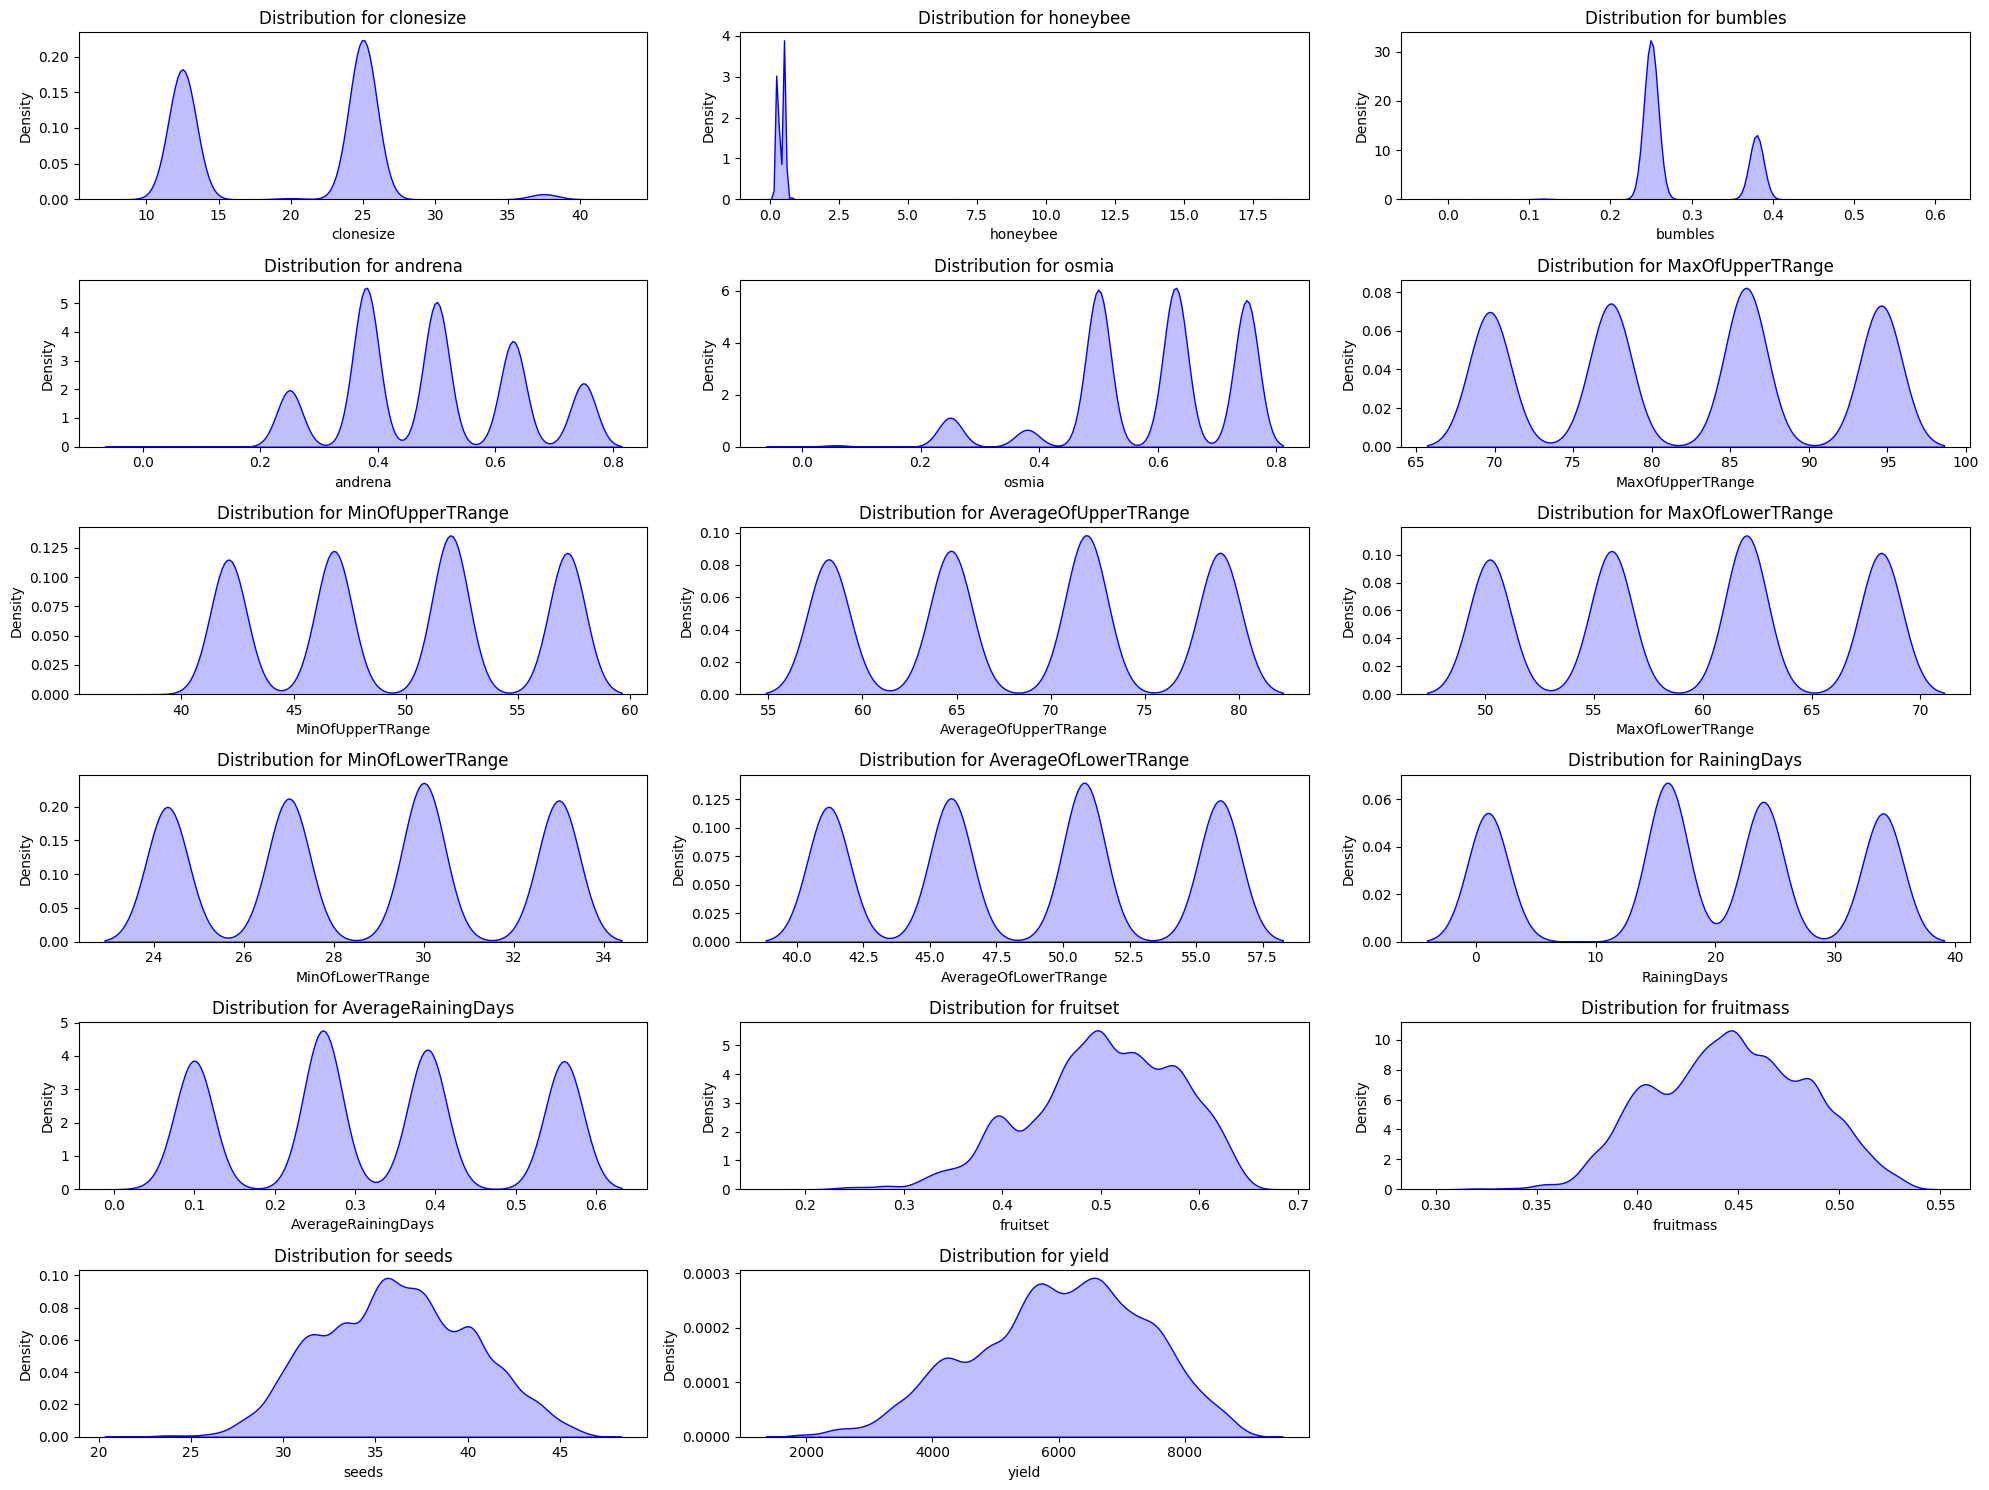

In [12]:
plt.figure(figsize=(20,15))

for i, col in enumerate(num_cols,1):
 plt.subplot(6,3,i)
 sns.kdeplot(train_data[col], fill=True, color='blue')
 plt.title(f'Distribution for {col}')

plt.tight_layout()
plt.show()

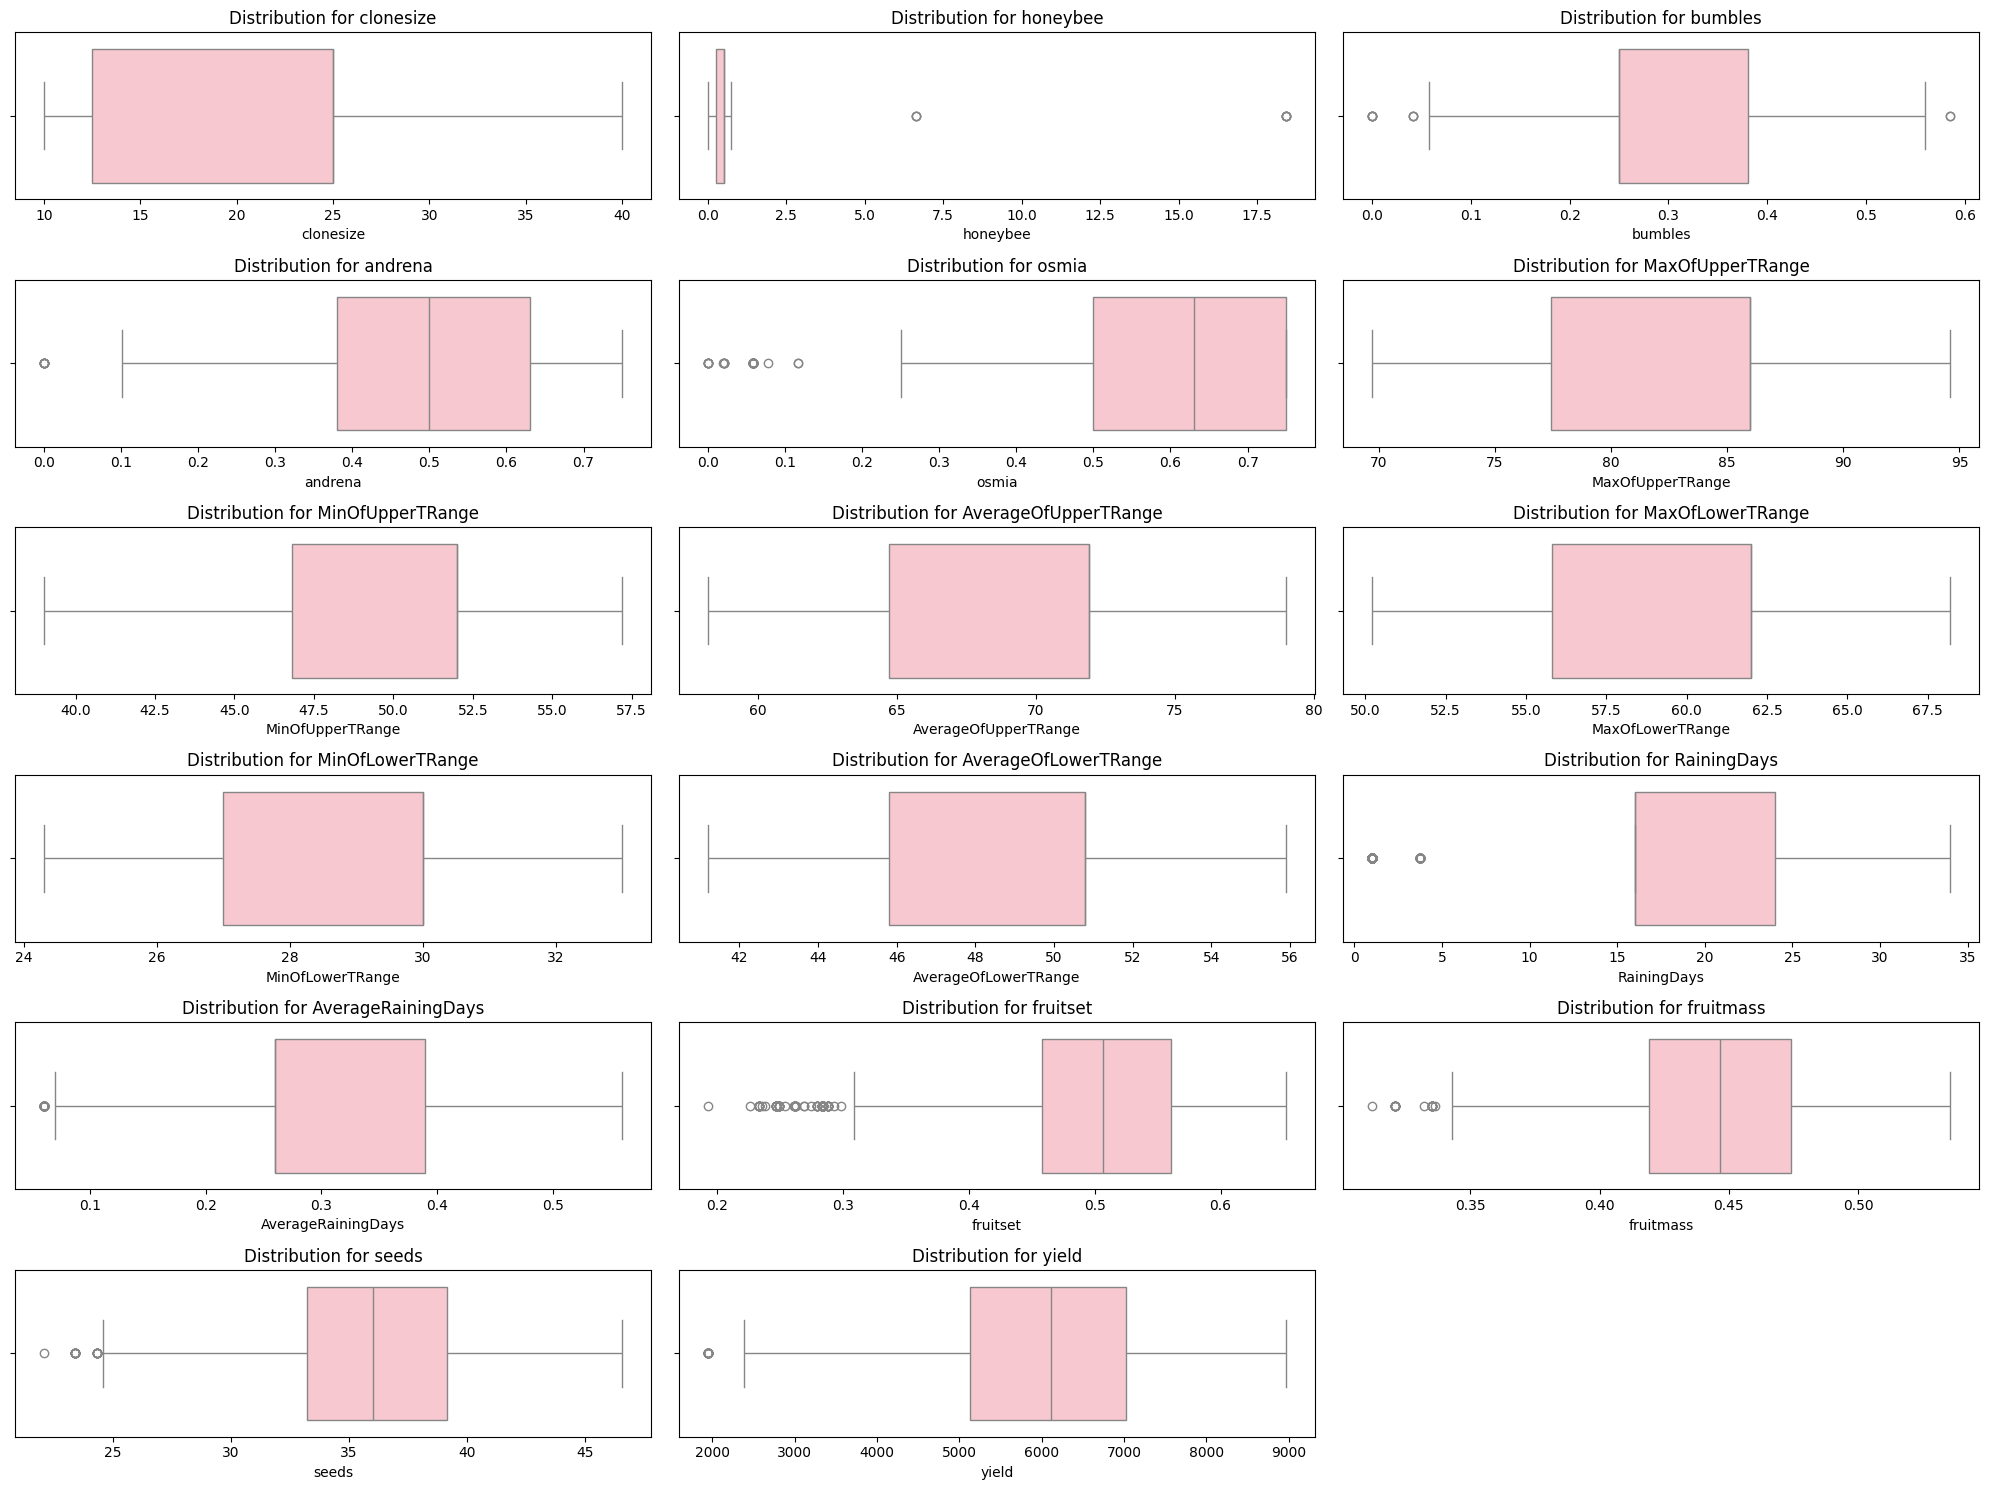

In [13]:
plt.figure(figsize=(20,15))

for i, col in enumerate(num_cols,1):
 plt.subplot(6,3,i)
 sns.boxplot(x=train_data[col], fill=True, color='pink')
 plt.title(f'Distribution for {col}')

plt.tight_layout()
plt.show()

## 5. Scaling and Transformation of data

In [14]:
print(train_data["honeybee"].nunique())


7


In [15]:
train_data['honeybee'].value_counts()

honeybee
0.500     7832
0.250     7285
0.750      110
0.537       38
0.000       16
18.430       5
6.640        3
Name: count, dtype: int64

- **Transforming honeybee and osmia**

In [16]:
from scipy.stats import boxcox
# Transform honeybee
train_data["honeybee_boxcox"], lambda_val = boxcox(train_data["honeybee"] + 1)  # Add 1 to avoid zero issues
print("Lambda:", lambda_val)  # The optimal power transformation

Lambda: -1.6741824692718679


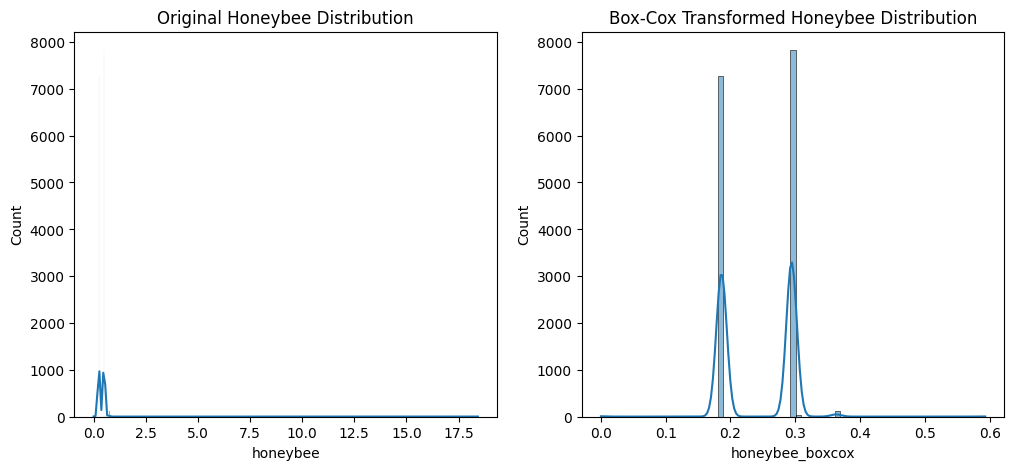

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_data["honeybee"], kde=True, ax=axes[0])
axes[0].set_title("Original Honeybee Distribution")

sns.histplot(train_data["honeybee_boxcox"], kde=True, ax=axes[1])
axes[1].set_title("Box-Cox Transformed Honeybee Distribution")

plt.show()


different types of boxcoxs####





In [18]:
train_data.groupby('honeybee')['honeybee_boxcox'].value_counts()

honeybee  honeybee_boxcox
0.000     0.000000             16
0.250     0.186202           7285
0.500     0.294344           7832
0.537     0.306455             38
0.750     0.363257            110
6.640     0.577457              3
18.430    0.593147              5
Name: count, dtype: int64

In [19]:
train_data["osmia_box_cox"], lambda_val = boxcox(train_data["osmia"]+1)  # Add 1 to avoid zero issues
print("Lambda:", lambda_val)  # The optimal power transformation

Lambda: 4.569498566422468


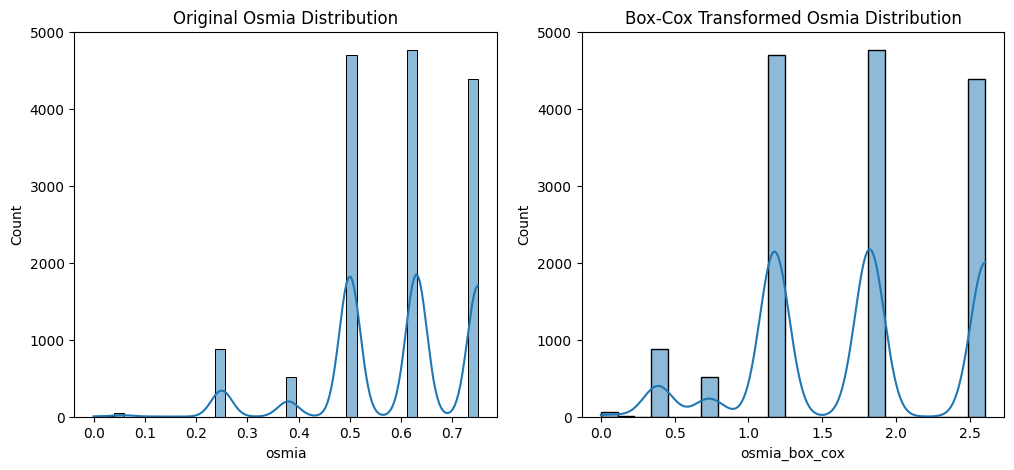

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_data["osmia"], kde=True, ax=axes[0])
axes[0].set_title("Original Osmia Distribution")

sns.histplot(train_data["osmia_box_cox"], kde=True, ax=axes[1])
axes[1].set_title("Box-Cox Transformed Osmia Distribution")

plt.show()

In [21]:
train_data.groupby('osmia')['osmia_box_cox'].value_counts()

osmia  osmia_box_cox
0.000  0.000000            6
0.020  0.020726            1
0.021  0.021801            4
0.058  0.064309           42
0.078  0.089606            1
0.117  0.143994            2
0.250  0.387840          872
0.380  0.734631          509
0.500  1.176819         4699
0.585  1.576573            1
0.606  1.687871            1
0.620  1.765013            1
0.630  1.821591         4763
0.750  2.604044         4387
Name: count, dtype: int64

- **Scatter plot**

In [22]:
def plot_scatter(df, target):

    # Select numeric columns excluding the target column
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    num_cols = [col for col in num_cols if col != target]

    # Determine the number of subplots
    n_cols = 4  # Number of columns in the subplot grid
    n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate the number of rows

    # Create the figure and axes
    plt.figure(figsize=(20, 5 * n_rows))  # Adjust figure height based on the number of rows
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.scatterplot(x=df[col], y=df[target], alpha=0.5)
        plt.title(f'{col} vs {target}')
        plt.xlabel(col)
        plt.ylabel(target)
    # plt.savefig('plots/scatterplot.png', dpi=300, bbox_inches="tight")
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

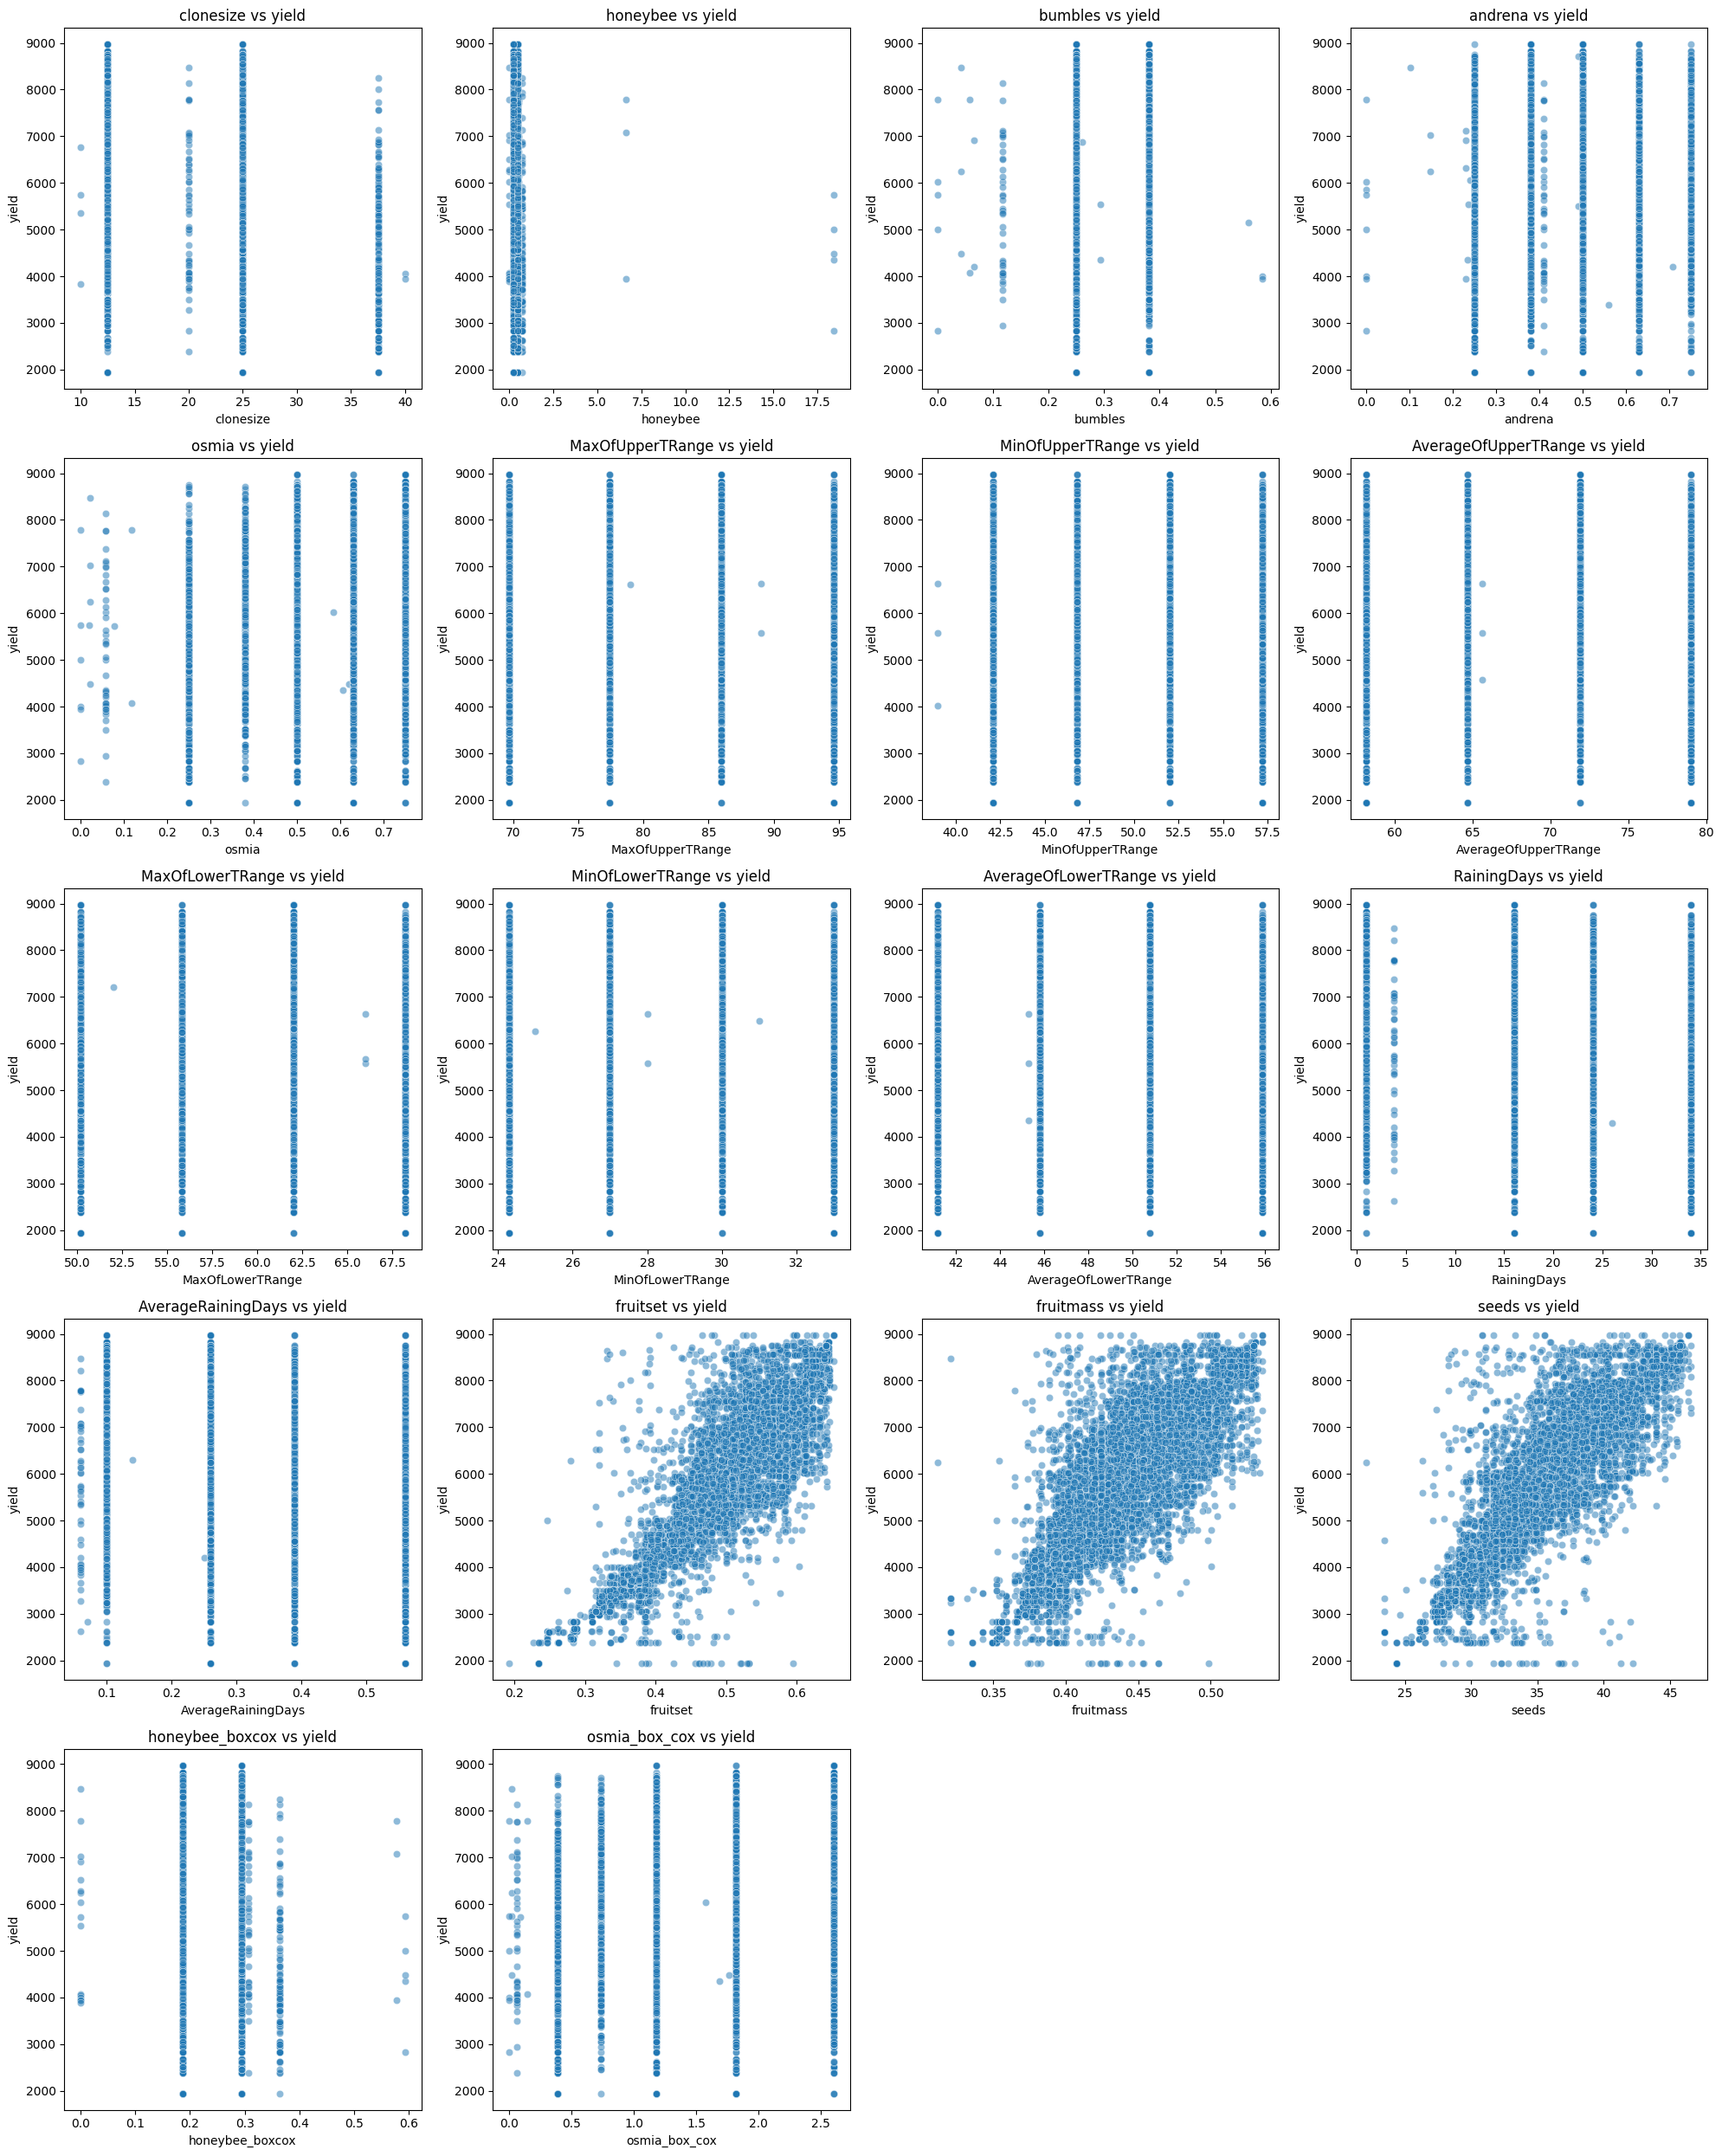

In [23]:
plot_scatter(train_data.drop('id',axis=1),'yield')

In [24]:
train_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield', 'honeybee_boxcox', 'osmia_box_cox'],
      dtype='object')

## Encoding categorical float columns

In [25]:
train_data.skew()
# Skewness has improved

id                       0.000000
clonesize                0.049861
honeybee                41.613244
bumbles                  0.815571
andrena                  0.162047
osmia                   -0.845196
MaxOfUpperTRange         0.007359
MinOfUpperTRange         0.002006
AverageOfUpperTRange    -0.004707
MaxOfLowerTRange         0.002450
MinOfLowerTRange         0.004846
AverageOfLowerTRange     0.005105
RainingDays             -0.261968
AverageRainingDays       0.081863
fruitset                -0.426606
fruitmass               -0.055531
seeds                    0.015387
yield                   -0.291195
honeybee_boxcox         -0.001213
osmia_box_cox           -0.124483
dtype: float64

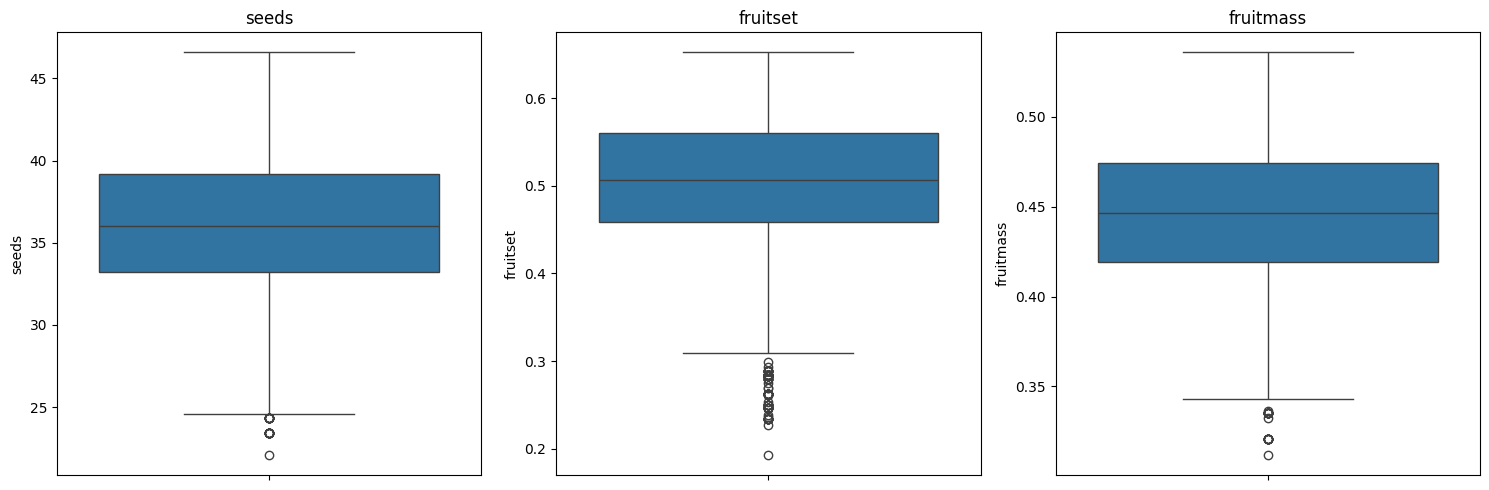

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots to identify outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(['seeds', 'fruitset', 'fruitmass']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [27]:
# Create a polynomial transformer if needed
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(train_data[['seeds', 'fruitset', 'fruitmass']])

# Create feature names and add to dataframe
feature_names = poly.get_feature_names_out(['seeds', 'fruitset', 'fruitmass'])
df_poly = pd.DataFrame(poly_features, columns=feature_names)

In [28]:
df_poly['yield'] = train_data['yield']

In [29]:
df_poly.head()

seeds  fruitset  fruitmass      seeds^2  seeds fruitset  \
0  32.460887  0.425011   0.417545  1053.709197       13.796231   
1  33.858317  0.444908   0.422051  1146.385639       15.063846   
2  38.341781  0.552927   0.470853  1470.092188       21.200199   
3  39.467561  0.565976   0.478137  1557.688398       22.337712   
4  40.484512  0.579677   0.494165  1638.995698       23.467926   

   seeds fruitmass  fruitset^2  fruitset fruitmass  fruitmass^2       yield  
0        13.553895    0.180634            0.177461     0.174344  4476.81146  
1        14.289950    0.197943            0.187774     0.178127  5548.12201  
2        18.053338    0.305728            0.260347     0.221702  6869.77760  
3        18.870884    0.320329            0.270614     0.228615  6880.77590  
4        20.006019    0.336025            0.286456     0.244199  7479.93417

In [30]:
df_poly.columns

Index(['seeds', 'fruitset', 'fruitmass', 'seeds^2', 'seeds fruitset',
       'seeds fruitmass', 'fruitset^2', 'fruitset fruitmass', 'fruitmass^2',
       'yield'],
      dtype='object')

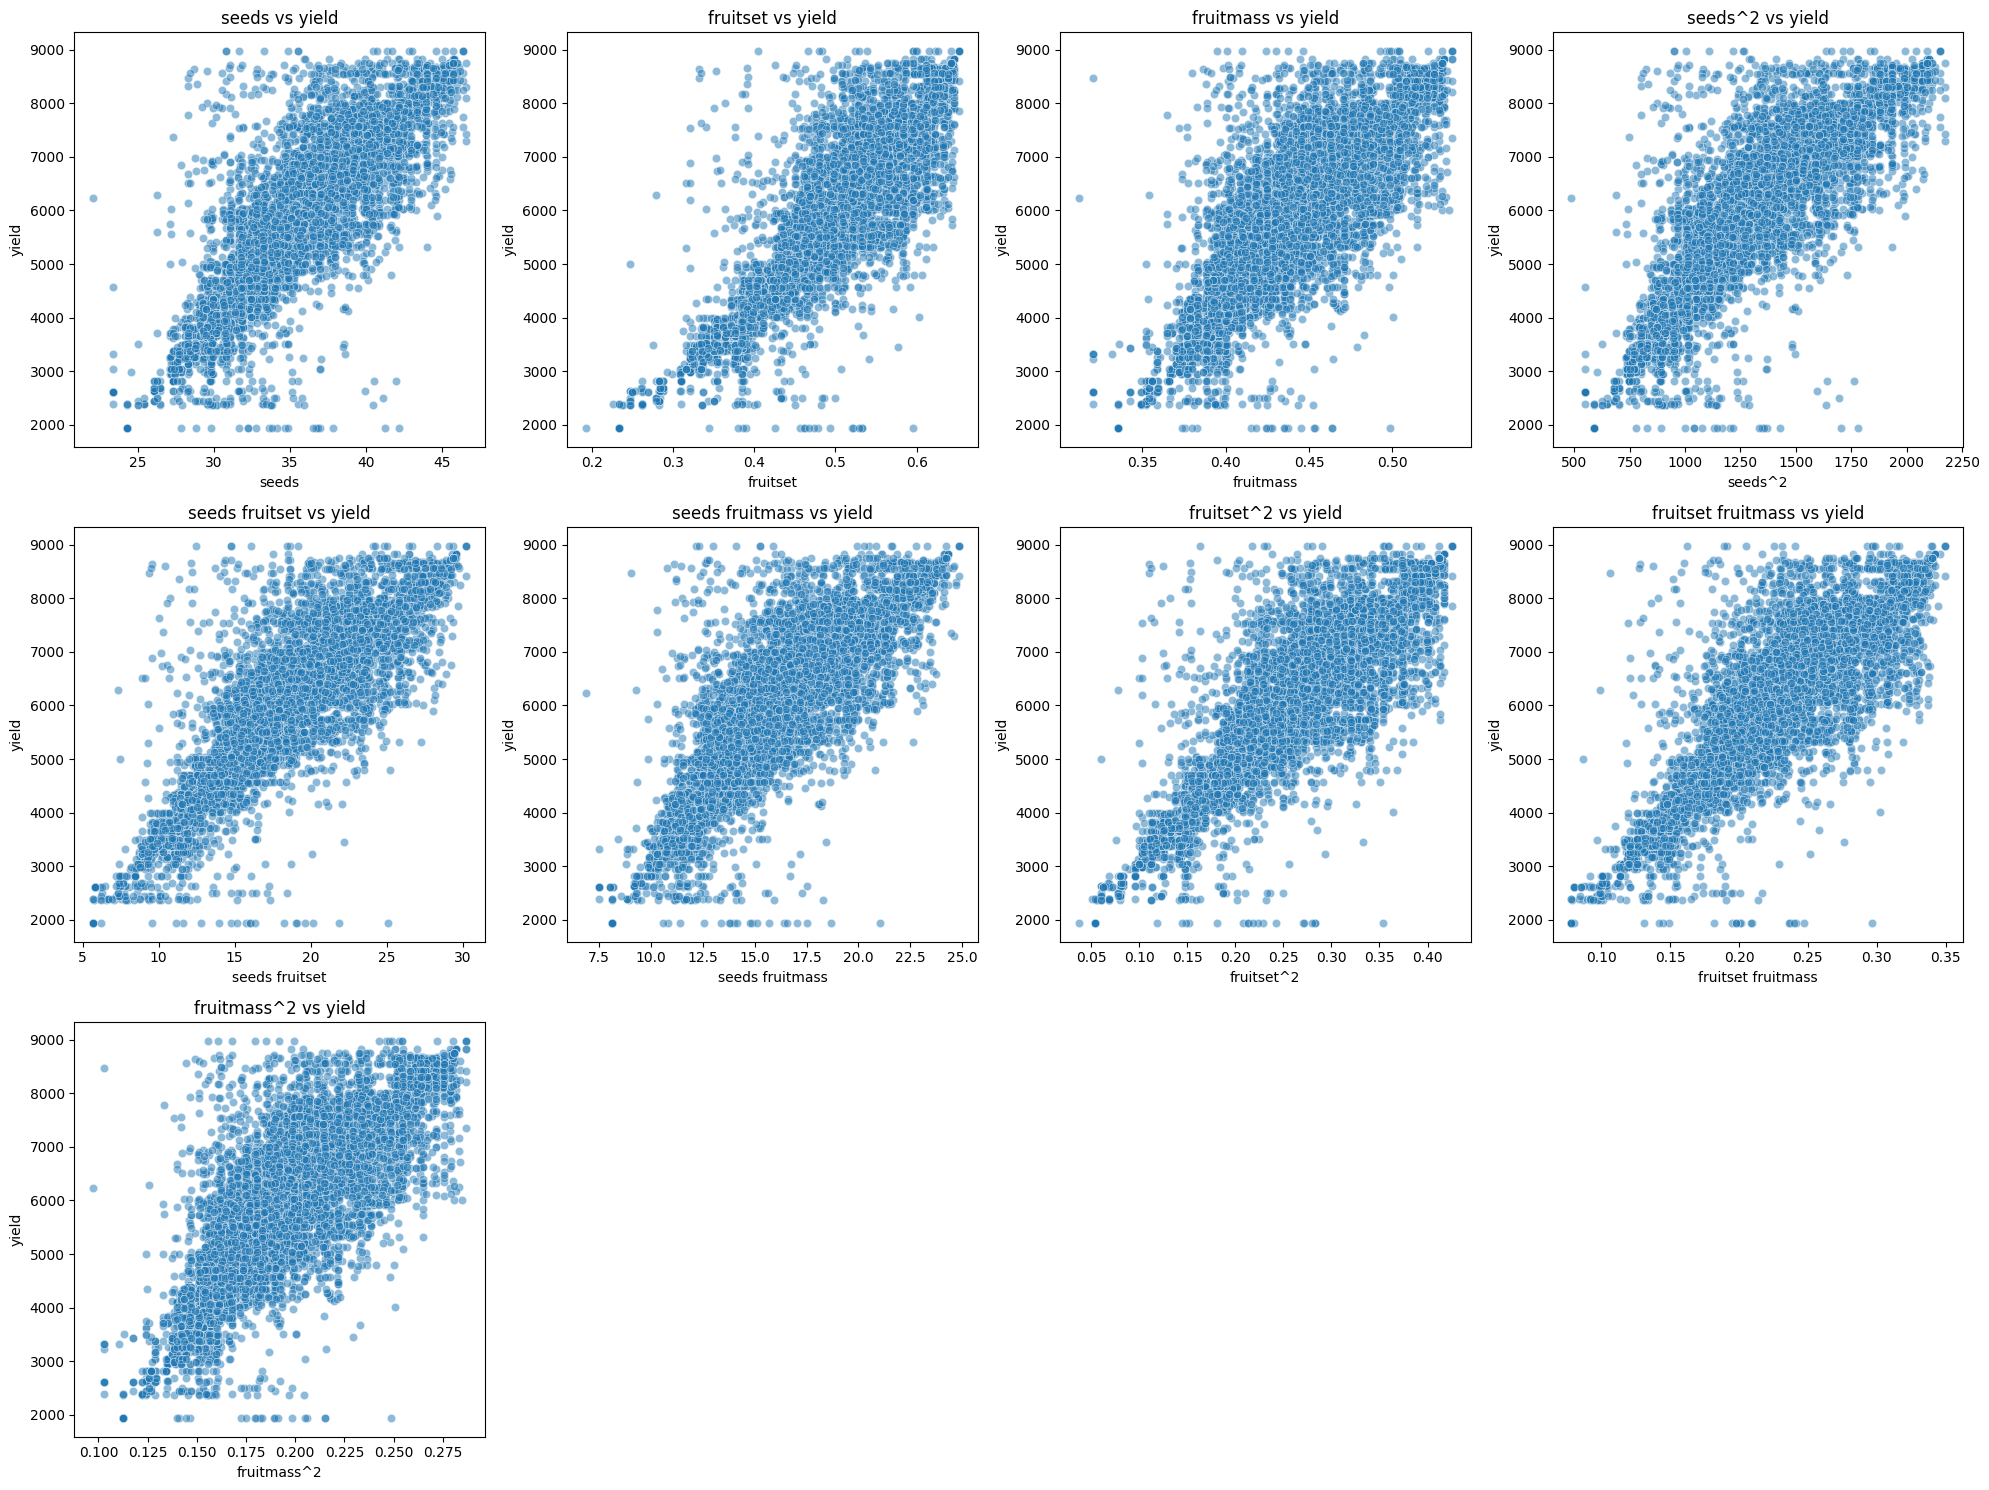

In [31]:
plot_scatter(df_poly,'yield')

6. Scaling

In [32]:
train_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield', 'honeybee_boxcox', 'osmia_box_cox'],
      dtype='object')

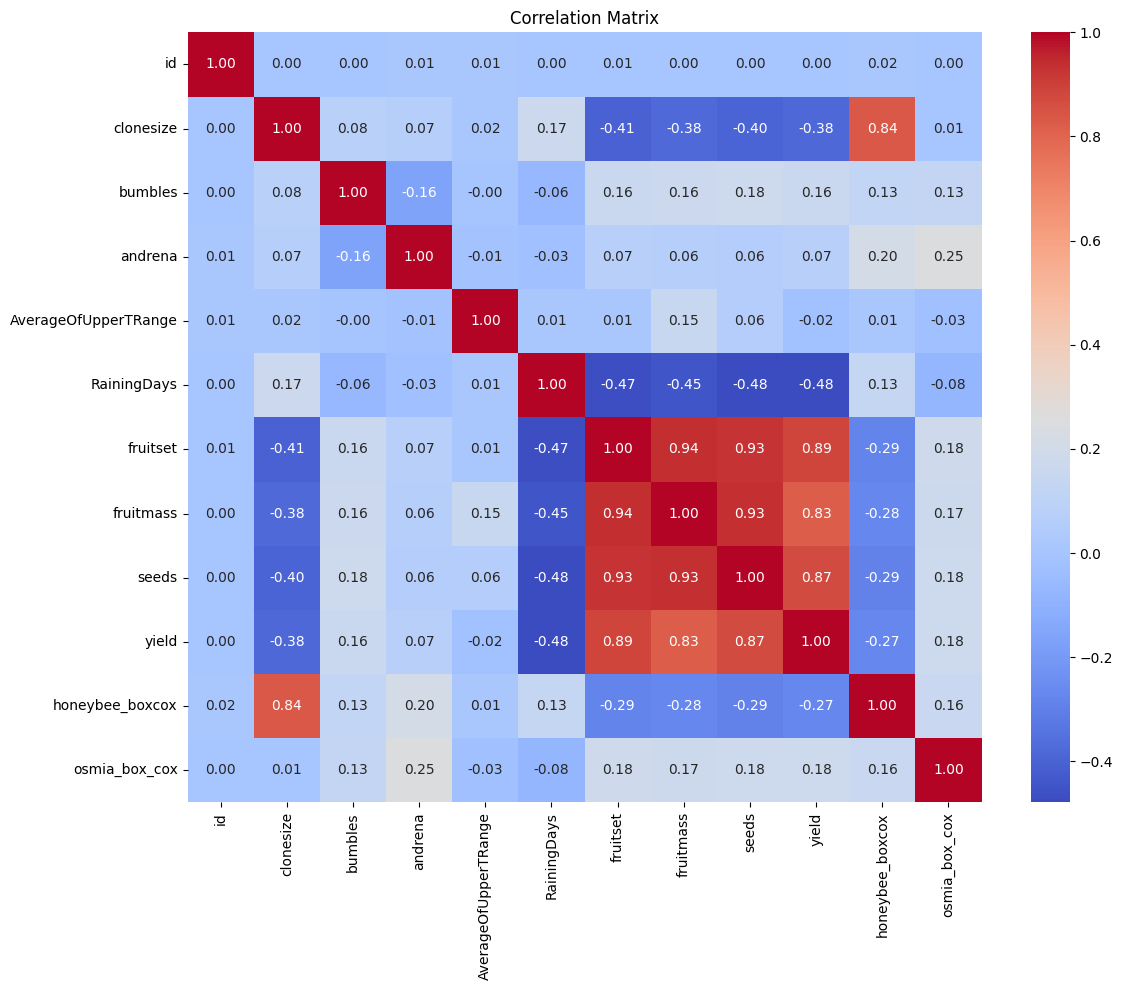

In [44]:
correlations = train_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [34]:
train_data.describe().T

count         mean          std          min  \
id                    15289.0  7644.000000  4413.698468     0.000000   
clonesize             15289.0    19.704690     6.595211    10.000000   
honeybee              15289.0     0.389314     0.361643     0.000000   
bumbles               15289.0     0.286768     0.059917     0.000000   
andrena               15289.0     0.492675     0.148115     0.000000   
osmia                 15289.0     0.592355     0.139489     0.000000   
MaxOfUpperTRange      15289.0    82.169887     9.146703    69.700000   
MinOfUpperTRange      15289.0    49.673281     5.546405    39.000000   
AverageOfUpperTRange  15289.0    68.656256     7.641807    58.200000   
MaxOfLowerTRange      15289.0    59.229538     6.610640    50.200000   
MinOfLowerTRange      15289.0    28.660553     3.195367    24.300000   
AverageOfLowerTRange  15289.0    48.568500     5.390545    41.200000   
RainingDays           15289.0    18.660865    11.657582     1.000000   
AverageRainingDays    15289.0     0.324176     0.163905     0.060000   
fruitset              15289.0     0.502741     0.074390     0.192732   
fruitmass             15289.0     0.446553     0.037035     0.311921   
seeds                 15289.0    36.164950     4.031087    22.079199   
yield                 15289.0  6025.193999  1337.056850  1945.530610   
honeybee_boxcox       15289.0     0.243187     0.055908     0.000000   
osmia_box_cox         15289.0     1.723487     0.679590     0.000000   

                              25%          50%           75%           max  
id                    3822.000000  7644.000000  11466.000000  15288.000000  
clonesize               12.500000    25.000000     25.000000     40.000000  
honeybee                 0.250000     0.500000      0.500000     18.430000  
bumbles                  0.250000     0.250000      0.380000      0.585000  
andrena                  0.380000     0.500000      0.630000      0.750000  
osmia                    0.500000     0.630000      0.750000      0.750000  
MaxOfUpperTRange        77.400000    86.000000     86.000000     94.600000  
MinOfUpperTRange        46.800000    52.000000     52.000000     57.200000  
AverageOfUpperTRange    64.700000    71.900000     71.900000     79.000000  
MaxOfLowerTRange        55.800000    62.000000     62.000000     68.200000  
MinOfLowerTRange        27.000000    30.000000     30.000000     33.000000  
AverageOfLowerTRange    45.800000    50.800000     50.800000     55.900000  
RainingDays             16.000000    16.000000     24.000000     34.000000  
AverageRainingDays       0.260000     0.260000      0.390000      0.560000  
fruitset                 0.458246     0.506600      0.560445      0.652144  
fruitmass                0.419216     0.446570      0.474134      0.535660  
seeds                   33.232449    36.040675     39.158238     46.585105  
yield                 5128.163510  6117.475900   7019.694380   8969.401840  
honeybee_boxcox          0.186202     0.294344      0.294344      0.593147  
osmia_box_cox            1.176819     1.821591      2.604044      2.604044

In [35]:
train_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield', 'honeybee_boxcox', 'osmia_box_cox'],
      dtype='object')

## Scaling train_data

In [40]:
train_data = train_data.drop(['honeybee','osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange',
                   'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange','AverageRainingDays'], axis=1)

In [41]:
train_data.columns

Index(['id', 'clonesize', 'bumbles', 'andrena', 'AverageOfUpperTRange',
       'RainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield',
       'honeybee_boxcox', 'osmia_box_cox'],
      dtype='object')

In [42]:
# All columns except these ones
columns_to_exclude = ['id','honeybee_boxcox', 'osmia_box_cox']
columns_to_scale = [col for col in train_data.columns if col not in columns_to_exclude]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaling
train_data.loc[:,columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])

In [43]:
train_data.describe().T

count          mean          std       min  \
id                    15289.0  7.644000e+03  4413.698468  0.000000   
clonesize             15289.0 -2.111087e-16     1.000033 -1.471523   
bumbles               15289.0  8.165502e-16     1.000033 -4.786246   
andrena               15289.0  1.989092e-16     1.000033 -3.326411   
AverageOfUpperTRange  15289.0  3.327547e-16     1.000033 -1.368341   
RainingDays           15289.0  2.109925e-16     1.000033 -1.515018   
fruitset              15289.0  1.914734e-16     1.000033 -4.167510   
fruitmass             15289.0  8.314219e-16     1.000033 -3.635347   
seeds                 15289.0  1.633217e-15     1.000033 -3.494396   
yield                 15289.0  1.345426e-16     1.000033 -3.051326   
honeybee_boxcox       15289.0  2.431872e-01     0.055908  0.000000   
osmia_box_cox         15289.0  1.723487e+00     0.679590  0.000000   

                              25%          50%           75%           max  
id                    3822.000000  7644.000000  11466.000000  15288.000000  
clonesize               -1.092448     0.802929      0.802929      3.077381  
bumbles                 -0.613664    -0.613664      1.556078      4.977594  
andrena                 -0.760754     0.049454      0.927179      1.737386  
AverageOfUpperTRange    -0.517729     0.424487      0.424487      1.353617  
RainingDays             -0.228259    -0.228259      0.458012      1.315851  
fruitset                -0.598147     0.051875      0.775730      2.008454  
fruitmass               -0.738158     0.000468      0.744748      2.406102  
seeds                   -0.727495    -0.030830      0.742575      2.585034  
yield                   -0.670921     0.069021      0.743822      2.202078  
honeybee_boxcox          0.186202     0.294344      0.294344      0.593147  
osmia_box_cox            1.176819     1.821591      2.604044      2.604044

In [45]:
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns to encode
categorical_cols = ['clonesize', 'bumbles', 'andrena',
                   'AverageOfUpperTRange',
                   'RainingDays', 'honeybee_boxcox',
                   'osmia_box_cox']

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the data
encoded_data = encoder.fit_transform(train_data[categorical_cols])

# Create a DataFrame with the encoded data
# Get the feature names from the encoder
feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Combine with the non-categorical columns
non_cat_cols = [col for col in train_data.columns if col not in categorical_cols]
encoded_df = pd.concat([train_data[non_cat_cols].reset_index(drop=True),
                     encoded_df.reset_index(drop=True)], axis=1)

In [46]:
encoded_df.shape

(15289, 63)

In [47]:
encoded_df.describe().T

count          mean          std  \
id                                15289.0  7.644000e+03  4413.698468   
fruitset                          15289.0  1.914734e-16     1.000033   
fruitmass                         15289.0  8.314219e-16     1.000033   
seeds                             15289.0  1.633217e-15     1.000033   
yield                             15289.0  1.345426e-16     1.000033   
...                                   ...           ...          ...   
osmia_box_cox_1.5765728227146638  15289.0  6.540650e-05     0.008087   
osmia_box_cox_1.6878709644732326  15289.0  6.540650e-05     0.008087   
osmia_box_cox_1.7650130037298235  15289.0  6.540650e-05     0.008087   
osmia_box_cox_1.8215909358672753  15289.0  3.115312e-01     0.463134   
osmia_box_cox_2.6040444508048703  15289.0  2.869383e-01     0.452347   

                                       min          25%          50%  \
id                                0.000000  3822.000000  7644.000000   
fruitset                         -4.167510    -0.598147     0.051875   
fruitmass                        -3.635347    -0.738158     0.000468   
seeds                            -3.494396    -0.727495    -0.030830   
yield                            -3.051326    -0.670921     0.069021   
...                                    ...          ...          ...   
osmia_box_cox_1.5765728227146638  0.000000     0.000000     0.000000   
osmia_box_cox_1.6878709644732326  0.000000     0.000000     0.000000   
osmia_box_cox_1.7650130037298235  0.000000     0.000000     0.000000   
osmia_box_cox_1.8215909358672753  0.000000     0.000000     0.000000   
osmia_box_cox_2.6040444508048703  0.000000     0.000000     0.000000   

                                           75%           max  
id                                11466.000000  15288.000000  
fruitset                              0.775730      2.008454  
fruitmass                             0.744748      2.406102  
seeds                                 0.742575      2.585034  
yield                                 0.743822      2.202078  
...                                        ...           ...  
osmia_box_cox_1.5765728227146638      0.000000      1.000000  
osmia_box_cox_1.6878709644732326      0.000000      1.000000  
osmia_box_cox_1.7650130037298235      0.000000      1.000000  
osmia_box_cox_1.8215909358672753      1.000000      1.000000  
osmia_box_cox_2.6040444508048703      1.000000      1.000000  

[63 rows x 8 columns]

In [48]:
encoded_df.columns

Index(['id', 'fruitset', 'fruitmass', 'seeds', 'yield',
       'clonesize_-1.0924480553587272', 'clonesize_0.04477794848001295',
       'clonesize_0.8029286177058398', 'clonesize_2.698305290770407',
       'clonesize_3.07738062538332', 'bumbles_-4.085252123499058',
       'bumbles_-3.8182069195914563', 'bumbles_-3.7013746428818806',
       'bumbles_-2.8334777301821754', 'bumbles_-0.6136644727002374',
       'bumbles_-0.4467612202579862', 'bumbles_0.10401951280144162',
       'bumbles_1.5560778090490255', 'bumbles_4.560336353009544',
       'bumbles_4.97759448411517', 'andrena_-2.644486703084019',
       'andrena_-2.3339070950368983', 'andrena_-1.7802651850398579',
       'andrena_-1.7465065319912578', 'andrena_-1.7397548013815378',
       'andrena_-1.7059961483329378', 'andrena_-1.6384788422357377',
       'andrena_-0.7607538629721365', 'andrena_-0.5649536752902565',
       'andrena_-0.01806349590293578', 'andrena_0.049453810194264355',
       'andrena_0.4545576467774652', 'andrena_0.9

In [49]:
# train_data = train_data.drop(['MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange',
#        'MinOfLowerTRange', 'AverageOfLowerTRange',
#        'AverageRainingDays'], axis=1)

In [50]:
train_data.columns

Index(['id', 'clonesize', 'bumbles', 'andrena', 'AverageOfUpperTRange',
       'RainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield',
       'honeybee_boxcox', 'osmia_box_cox'],
      dtype='object')

7. **Training**

In [52]:
X = encoded_df.drop(['id','yield'], axis=1)
y = encoded_df['yield']

In [53]:
X.describe()

fruitset     fruitmass         seeds  \
count  1.528900e+04  1.528900e+04  1.528900e+04   
mean   1.914734e-16  8.314219e-16  1.633217e-15   
std    1.000033e+00  1.000033e+00  1.000033e+00   
min   -4.167510e+00 -3.635347e+00 -3.494396e+00   
25%   -5.981469e-01 -7.381576e-01 -7.274954e-01   
50%    5.187476e-02  4.675927e-04 -3.083018e-02   
75%    7.757299e-01  7.447480e-01  7.425753e-01   
max    2.008454e+00  2.406102e+00  2.585034e+00   

       clonesize_-1.0924480553587272  clonesize_0.04477794848001295  \
count                   15289.000000                   15289.000000   
mean                        0.439335                       0.003663   
std                         0.496322                       0.060412   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         1.000000                       0.000000   
max                         1.000000                       1.000000   

       clonesize_0.8029286177058398  clonesize_2.698305290770407  \
count                  15289.000000                 15289.000000   
mean                       0.539277                     0.017333   
std                        0.498471                     0.130512   
min                        0.000000                     0.000000   
25%                        0.000000                     0.000000   
50%                        1.000000                     0.000000   
75%                        1.000000                     0.000000   
max                        1.000000                     1.000000   

       clonesize_3.07738062538332  bumbles_-4.085252123499058  \
count                15289.000000                15289.000000   
mean                     0.000131                    0.000196   
std                      0.011437                    0.014007   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       bumbles_-3.8182069195914563  ...  osmia_box_cox_0.08960623006697867  \
count                 15289.000000  ...                       15289.000000   
mean                      0.000131  ...                           0.000065   
std                       0.011437  ...                           0.008087   
min                       0.000000  ...                           0.000000   
25%                       0.000000  ...                           0.000000   
50%                       0.000000  ...                           0.000000   
75%                       0.000000  ...                           0.000000   
max                       1.000000  ...                           1.000000   

       osmia_box_cox_0.14399359865798889  osmia_box_cox_0.3878403200940344  \
count                       15289.000000                      15289.000000   
mean                            0.000131                          0.057034   
std                             0.011437                          0.231916   
min                             0.000000                          0.000000   
25%                             0.000000                          0.000000   
50%                             0.000000                          0.000000   
75%                             0.000000                          0.000000   
max                             1.000000                          1.000000   

       osmia_box_cox_0.7346313536065023  osmia_box_cox_1.176819467045477  \
count                      15289.000000                     15289.000000   
mean                           0.033292                         0.307345   
std                            0.179404                         0.461409   
mi

In [54]:
y.describe()

count    1.528900e+04
mean     1.345426e-16
std      1.000033e+00
min     -3.051326e+00
25%     -6.709212e-01
50%      6.902094e-02
75%      7.438225e-01
max      2.202078e+00
Name: yield, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12231, 61)
(3058, 61)
(12231,)
(3058,)


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression()

In [60]:
model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_train_prediction = model.predict(X_train)

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
mean_squared_error(y_train_prediction,y_train)

0.18657579659225246

In [64]:
y_test_prediction = model.predict(X_test)

In [65]:
mean_squared_error(y_test_prediction,y_test)

0.1874647302329792


- Polynomial, linearity
- Make pipeline
- Scatterplot

In [66]:
degrees = range(1,4)
train_errors = []
test_errors = []
bic_scores = []

In [67]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
n = len(y_train)
for d in degrees:
 model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
 model.fit(X_train, y_train)

 y_train_pred = model.predict(X_train)
 y_test_pred = model.predict(X_test)

 train_mse = mean_squared_error(y_train, y_train_pred)
 test_mse = mean_squared_error(y_test, y_test_pred)

 train_errors.append(train_mse)
 test_errors.append(test_mse)

 # Compute BIC: BIC = n * log(MSE) + k * log(n)
 k = sum(model.named_steps["linearregression"].coef_ != 0) # Number of parameters
 bic = n * np.log(train_mse) + k * np.log(n)
 bic_scores.append(bic)

 print(f"Degree {d}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}, BIC = {bic:.2f}")

Degree 1: Train MSE = 0.1866, Test MSE = 0.1875, BIC = -19960.73
Degree 2: Train MSE = 0.1768, Test MSE = 0.2713, BIC = -13448.58


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, label="Train MSE", marker="o")
plt.plot(degrees, test_errors, label="Test MSE", marker="o")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(degrees, bic_scores, label="BIC", marker="o", color="red")
plt.xlabel("Polynomial Degree")
plt.ylabel("BIC Score")
plt.title("BIC Curve")
plt.legend()
plt.show()